# Test EdgePath on MPASMesh

This notebook tests the functionality of the `EdgePath` object on `MPASMesh`. It finds the shortest path defined by edges on a `MPASMesh` that connect two points.  

In [1]:
import sys
import os
import cartopy.crs as ccrs
sys.path.append("..")
from mpasview import *

In [2]:
# mesh file
meshroot = os.environ['HOME']+'/data/mpas/grids'
meshfile = meshroot+'/oEC60to30v3_60layer.170905.meshonly.nc'

In [3]:
# define MPASMesh 
mpasmesh = MPASMesh(name='oEC60to30v3',filepath=meshfile)
print(mpasmesh)

<class 'mpasview.data.MPASMesh'>:
        name: oEC60to30v3
      ncells: 235160
      nedges: 714274
   nvertices: 478835
   on sphere: True


In [4]:
# load data
varname = 'bottomDepth'
data = xr.open_dataset(meshfile)[varname].data

In [5]:
# define MPASOMap
mpasomap = MPASOMap(data=data, name='Bottom depth', units='m',
                     mesh=mpasmesh)
print(mpasomap)

<class 'mpasview.data.MPASOMap'> (size=235160):
    name: Bottom depth
   units: m
    data: [82.471041 5476.726684 ... 4525.246844 5499.990273]
     lon: [185.336578 129.033944 ... 262.142174 143.990351]
     lat: [62.198095 18.467407 ... -68.167836 11.803854]
    mesh: oEC60to30v3
position: cell


## Labrador Sea

Show the path connecting three points in the Labrador Sea. Five reference points (`npoint_ref=5`) is added between each pair of endpoints to reduce divergence from the great circle.

Endpoints:
    P0: 304.5 53.5
    P1: 312.0 61.0
    P2: 321.0 51.0
Vertex closest to P0: 304.58613 53.44701
Vertex closest to P1: 312.08908 60.99671
 - Vertex closest to RefP1: 305.64650 54.63632
 - Vertex closest to RefP2: 306.75188 56.12108
 - Vertex closest to RefP3: 307.83648 57.23957
 - Vertex closest to RefP4: 309.43468 58.46836
 - Vertex closest to RefP5: 310.49792 59.84672
Vertex closest to P0: 312.08908 60.99671
Vertex closest to P1: 321.28230 50.81306
 - Vertex closest to RefP1: 314.15851 59.30576
 - Vertex closest to RefP2: 315.99555 57.52819
 - Vertex closest to RefP3: 317.15979 56.12552
 - Vertex closest to RefP4: 318.66954 53.97944
 - Vertex closest to RefP5: 319.90170 52.51468
Vertex closest to P0: 321.28230 50.81306
Vertex closest to P1: 304.58613 53.44701
 - Vertex closest to RefP1: 318.59680 51.63052
 - Vertex closest to RefP2: 316.02654 51.86489
 - Vertex closest to RefP3: 313.12535 52.57170
 - Vertex closest to RefP4: 310.43543 52.73025
 - Vertex closest to RefP5: 

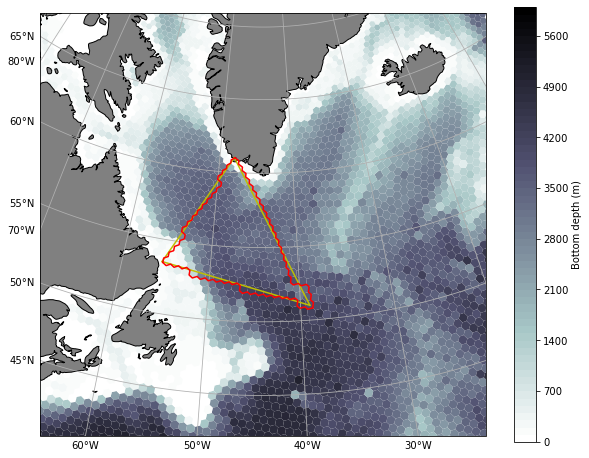

In [6]:
%%time
# set endpoints
lon_p0, lat_p0 = 304.5, 53.5
lon_p1, lat_p1 = 312, 61
lon_p2, lat_p2 = 321, 51
print('Endpoints:')
print('    P0: {:4.1f} {:4.1f}'.format(lon_p0, lat_p0))
print('    P1: {:4.1f} {:4.1f}'.format(lon_p1, lat_p1))
print('    P2: {:4.1f} {:4.1f}'.format(lon_p2, lat_p2))
# get the shortest path
path0 = mpasmesh.get_shortest_path_edge(lon_p0, lat_p0,
                                        lon_p1, lat_p1,
                                        npoint_ref=5,
                                        debug_info=False) 
path1 = mpasmesh.get_shortest_path_edge(lon_p1, lat_p1,
                                        lon_p2, lat_p2,
                                        npoint_ref=5,
                                        debug_info=False)
path2 = mpasmesh.get_shortest_path_edge(lon_p2, lat_p2,
                                        lon_p0, lat_p0,
                                        npoint_ref=5,
                                        debug_info=False) 
print(path0)
print(path1)
print(path2)

plt.figure(figsize=[10,8])
levels = np.linspace(0, 6000, 61)
m = mpasomap.plot(region='LabSea', levels=levels, cmap='bone_r',
                 ptype='pcolor')

# plot cross sections
plt.plot([lon_p0, lon_p1], [lat_p0, lat_p1], color='y', transform=ccrs.Geodetic())
plt.plot([lon_p1, lon_p2], [lat_p1, lat_p2], color='y', transform=ccrs.Geodetic())
plt.plot([lon_p2, lon_p0], [lat_p2, lat_p0], color='y', transform=ccrs.Geodetic())
# plot paths
path0.project_edge(m, c='r')
path1.project_edge(m, c='r')
path2.project_edge(m, c='r')
